In [2]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=Warning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
loan_df = pd.read_csv('accepted_2007_to_2018Q4.csv')

In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_df.shape

(2260701, 151)

In [6]:
loan_df_master=loan_df.copy()

In [12]:
loan_df_master.dropna().any(axis=0)

id                       False
member_id                False
loan_amnt                False
funded_amnt              False
funded_amnt_inv          False
                         ...  
settlement_status        False
settlement_date          False
settlement_amount        False
settlement_percentage    False
settlement_term          False
Length: 151, dtype: bool

In [13]:
loan_df_master.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
columns=['id','loan_amnt','int_rate','installment','grade','emp_title','home_ownership','annual_inc','loan_status','purpose','title','dti','delinq_2yrs','fico_range_low','fico_range_high','inq_last_6mths','mths_since_last_delinq','revol_bal','out_prncp','last_fico_range_high','last_fico_range_low','application_type','annual_inc_joint','dti_joint']

In [18]:
loan_df_final=loan_df_master[columns]
loan_df_final.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,fico_range_high,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Fully Paid,debt_consolidation,...,679.0,1.0,30.0,2765.0,0.00,564.0,560.0,Individual,NaN,NaN
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Fully Paid,small_business,...,719.0,4.0,6.0,21470.0,0.00,699.0,695.0,Individual,NaN,NaN
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Fully Paid,home_improvement,...,699.0,0.0,NaN,7869.0,0.00,704.0,700.0,Joint App,71000.0,13.85
3,66310712,35000.0,14.85,829.90,C,Information Systems Officer,MORTGAGE,110000.0,Current,debt_consolidation,...,789.0,0.0,NaN,7802.0,15897.65,679.0,675.0,Individual,NaN,NaN
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Fully Paid,major_purchase,...,699.0,3.0,12.0,21929.0,0.00,704.0,700.0,Individual,NaN,NaN


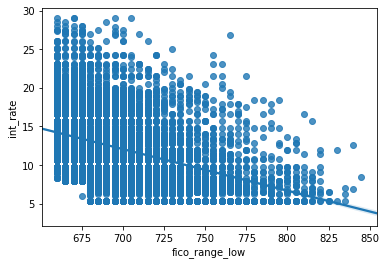

In [22]:
sns.regplot(x='fico_range_low',y='int_rate',data=loan_df_final[:10000])

With higher fico score the interest rate lowers

In [23]:
loan_df_final['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [28]:
loan_int_df=loan_df_final[loan_df_final['loan_status']!='Current']
loan_int_df=loan_int_df[loan_df_final['loan_status']!='Late (31-120 days)']
loan_int_df=loan_int_df[loan_df_final['loan_status']!='In Grace Period']
loan_int_df=loan_int_df[loan_df_final['loan_status']!='Late (16-30 days)']
loan_int_df=loan_int_df[loan_df_final['loan_status']!='Does not meet the credit policy. Status:Fully Paid']
loan_int_df=loan_int_df[loan_df_final['loan_status']!='Does not meet the credit policy. Status:Charged Off']


In [29]:
loan_int_df['loan_status'].value_counts()

Fully Paid     1076751
Charged Off     268559
Default             40
Name: loan_status, dtype: int64

In [30]:
loan_int_df.groupby('loan_status').agg({'last_fico_range_high':'mean'})

,last_fico_range_high
loan_status,
Charged Off,568.443236
Default,588.875000
Fully Paid,704.433473


High fico loans are paid and low fico ones are charged off---General view

In [31]:
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Charged Off','Default')
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Fully Paid','Good')

In [32]:
loan_int_df['loan_status'].value_counts()

Good       1076751
Default     268599
Name: loan_status, dtype: int64

In [33]:
loan_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345383 entries, 0 to 2260700
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1345383 non-null  object 
 1   loan_amnt               1345350 non-null  float64
 2   int_rate                1345350 non-null  float64
 3   installment             1345350 non-null  float64
 4   grade                   1345350 non-null  object 
 5   emp_title               1259559 non-null  object 
 6   home_ownership          1345350 non-null  object 
 7   annual_inc              1345350 non-null  float64
 8   loan_status             1345350 non-null  object 
 9   purpose                 1345350 non-null  object 
 10  title                   1328691 non-null  object 
 11  dti                     1344976 non-null  float64
 12  delinq_2yrs             1345350 non-null  float64
 13  fico_range_low          1345350 non-null  float64
 14  fi

In [34]:
loan_int_df['fico_range_low'].min()

625.0

In [35]:
loan_int_df['fico_range_low'].max()

845.0

In [36]:
loan_int_df['last_fico_range_low'].min()

0.0

In [37]:
loan_int_df['last_fico_range_low'].max()

845.0

In [39]:
loan_int_df['last_fico_range_low']=loan_int_df.apply(lambda x: x['fico_range_low'] if x['last_fico_range_low']==0.0 else x['last_fico_range_low'],axis=1)

In [40]:
loan_int_df['last_fico_range_low'].min()

500.0

In [44]:
loan_int_df.isnull().sum()

id                              0
loan_amnt                      33
int_rate                       33
installment                    33
grade                          33
emp_title                   85824
home_ownership                 33
annual_inc                     33
loan_status                    33
purpose                        33
title                       16692
dti                           407
delinq_2yrs                    33
fico_range_low                 33
fico_range_high                33
inq_last_6mths                 34
mths_since_last_delinq     678794
revol_bal                      33
out_prncp                      33
last_fico_range_high           33
last_fico_range_low            33
application_type               33
annual_inc_joint          1319577
dti_joint                 1319580
dtype: int64

In [49]:
loan_int_df = loan_int_df.dropna(axis=0, subset=['loan_amnt','fico_range_low','inq_last_6mths'])

In [50]:
loan_int_df.isnull().sum()

id                              0
loan_amnt                       0
int_rate                        0
installment                     0
grade                           0
emp_title                   85791
home_ownership                  0
annual_inc                      0
loan_status                     0
purpose                         0
title                       16659
dti                           374
delinq_2yrs                     0
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                  0
mths_since_last_delinq     678760
revol_bal                       0
out_prncp                       0
last_fico_range_high            0
last_fico_range_low             0
application_type                0
annual_inc_joint          1319543
dti_joint                 1319546
dtype: int64

In [51]:
import math
loan_int_df['fico_score']=loan_int_df['last_fico_range_low'].apply(lambda x:int(math.ceil(x/10))*10)

In [52]:
loan_int_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Good,debt_consolidation,...,1.0,30.0,2765.0,0.0,564.0,560.0,Individual,NaN,NaN,560
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Good,small_business,...,4.0,6.0,21470.0,0.0,699.0,695.0,Individual,NaN,NaN,700
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Good,home_improvement,...,0.0,NaN,7869.0,0.0,704.0,700.0,Joint App,71000.0,13.85,700
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Good,major_purchase,...,3.0,12.0,21929.0,0.0,704.0,700.0,Individual,NaN,NaN,700
5,68426831,11950.0,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Good,debt_consolidation,...,0.0,NaN,8822.0,0.0,759.0,755.0,Individual,NaN,NaN,760


In [53]:
loan_int_df[loan_int_df['dti'].isnull()]

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score
18202,66415476,20000.0,16.99,712.96,D,NaN,MORTGAGE,0.0,Good,debt_consolidation,...,1.0,NaN,7161.0,0.0,649.0,645.0,Joint App,185000.0,5.31,650
65620,65199509,3700.0,12.59,123.94,C,NaN,MORTGAGE,0.0,Default,credit_card,...,1.0,10.0,10649.0,0.0,539.0,535.0,Joint App,40988.0,28.72,540
422321,130138254,40000.0,15.04,1387.40,C,NaN,MORTGAGE,0.0,Default,debt_consolidation,...,0.0,6.0,5646.0,0.0,584.0,580.0,Joint App,200000.0,22.90,580
422892,130712137,21000.0,11.98,697.30,B,NaN,MORTGAGE,0.0,Good,debt_consolidation,...,0.0,NaN,11846.0,0.0,704.0,700.0,Joint App,70000.0,8.45,700
424935,129700950,16800.0,7.34,335.37,A,NaN,MORTGAGE,0.0,Good,home_improvement,...,0.0,NaN,288.0,0.0,759.0,755.0,Joint App,130000.0,8.90,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222132,92004398,16000.0,21.49,437.28,D,NaN,MORTGAGE,0.0,Good,credit_card,...,0.0,46.0,11735.0,0.0,719.0,715.0,Joint App,125000.0,24.88,720
2228436,91834232,8750.0,15.99,307.59,C,NaN,MORTGAGE,0.0,Default,debt_consolidation,...,0.0,NaN,14111.0,0.0,549.0,545.0,Joint App,25000.0,24.30,550
2228456,91685988,18000.0,17.99,456.99,D,Independent Consultant,MORTGAGE,0.0,Default,debt_consolidation,...,0.0,58.0,2601.0,0.0,509.0,505.0,Joint App,55000.0,25.13,510
2231449,91843866,15000.0,11.39,493.86,B,NaN,MORTGAGE,1.0,Good,debt_consolidation,...,1.0,11.0,3470.0,0.0,499.0,680.0,Joint App,150001.0,13.35,680


In [54]:
loan_int_df['dti_final']=loan_int_df.apply(lambda x: x['dti_joint'] if pd.isnull(x['dti']) else x['dti'],axis=1)
loan_int_df['annual_inc_final']=loan_int_df.apply(lambda x: x['annual_inc_joint'] if x['annual_inc']==0.0 else x['annual_inc'],axis=1)


In [55]:
loan_int_df.isnull().sum()

id                              0
loan_amnt                       0
int_rate                        0
installment                     0
grade                           0
emp_title                   85791
home_ownership                  0
annual_inc                      0
loan_status                     0
purpose                         0
title                       16659
dti                           374
delinq_2yrs                     0
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                  0
mths_since_last_delinq     678760
revol_bal                       0
out_prncp                       0
last_fico_range_high            0
last_fico_range_low             0
application_type                0
annual_inc_joint          1319543
dti_joint                 1319546
fico_score                      0
dti_final                       0
annual_inc_final                0
dtype: int64

In [56]:
loan_int_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score,dti_final,annual_inc_final
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Good,debt_consolidation,...,2765.0,0.0,564.0,560.0,Individual,NaN,NaN,560,5.91,55000.0
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Good,small_business,...,21470.0,0.0,699.0,695.0,Individual,NaN,NaN,700,16.06,65000.0
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Good,home_improvement,...,7869.0,0.0,704.0,700.0,Joint App,71000.0,13.85,700,10.78,63000.0
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Good,major_purchase,...,21929.0,0.0,704.0,700.0,Individual,NaN,NaN,700,25.37,104433.0
5,68426831,11950.0,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Good,debt_consolidation,...,8822.0,0.0,759.0,755.0,Individual,NaN,NaN,760,10.20,34000.0


In [57]:
loan_int_df['fico_score'].value_counts().sort_index()

500     7639
510    17618
520    20291
530    22479
540    25659
550    26564
560    26521
570    26325
580    25541
590    24686
600    24183
610    24831
620    25961
630    28104
640    32537
650    39583
660    55692
670    72233
680    81529
690    87607
700    88500
710    87075
720    82802
730    72321
740    60825
750    51075
760    43776
770    38550
780    34975
790    29422
800    23756
810    17930
820    11229
830     5659
840     1616
850      255
Name: fico_score, dtype: int64

In [59]:
fico_df = loan_int_df['fico_score'].value_counts().sort_index()

In [60]:
fico_df.head()

500     7639
510    17618
520    20291
530    22479
540    25659
Name: fico_score, dtype: int64

In [61]:
loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()

500     6473
510    14603
520    16468
530    17827
540    19576
550    19682
560    18985
570    17915
580    16402
590    14626
600    12907
610    11642
620    10272
630     8894
640     7549
650     6067
660     9070
670    10998
680     8336
690     6111
700     4274
710     3111
720     2160
730     1363
740      904
750      651
760      507
770      329
780      293
790      207
800      157
810      108
820       62
830       42
840       20
850        8
Name: fico_score, dtype: int64

In [64]:
loan_int_df[['fico_score','dti_final','loan_amnt','annual_inc']].groupby('fico_score').agg({'dti_final':'mean','loan_amnt':'mean','annual_inc':'median'})

,dti_final,loan_amnt,annual_inc
fico_score,,,
500,18.605257,13649.574552,56000.0
510,19.079867,13812.613520,56180.0
520,19.345288,14035.338327,58000.0
530,19.509439,14409.595623,60000.0
540,19.991945,14587.376749,60000.0
550,19.985483,14742.559479,60000.0
560,20.051207,14792.014818,60299.0
570,19.983194,14800.444444,61000.0
580,19.895437,14754.571082,61000.0


In [65]:
loan_int_df[['fico_score','loan_amnt','annual_inc']].groupby('fico_score').mean()

,loan_amnt,annual_inc
fico_score,,
500,13649.574552,64869.514459
510,13812.613520,65442.381248
520,14035.338327,68070.780816
530,14409.595623,68569.694849
540,14587.376749,69619.406312
550,14742.559479,70645.536821
560,14792.014818,71634.333841
570,14800.444444,72040.297835
580,14754.571082,72470.838797


In [68]:
fico_df = pd.concat([fico_df,pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()),pd.DataFrame(loan_int_df[['fico_score','dti_final','loan_amnt','annual_inc']].groupby('fico_score').agg({'dti_final':'mean','loan_amnt':'mean','annual_inc':'median'})),pd.DataFrame(loan_int_df[['fico_score','int_rate','annual_inc']].groupby('fico_score').mean())], ignore_index=True, axis=1)

In [69]:
fico_df.head()

,0,1,2,3,4,5,6
500,7639,6473,18.605257,13649.574552,56000.0,15.741988,64869.514459
510,17618,14603,19.079867,13812.613520,56180.0,15.772802,65442.381248
520,20291,16468,19.345288,14035.338327,58000.0,15.572715,68070.780816
530,22479,17827,19.509439,14409.595623,60000.0,15.719068,68569.694849
540,25659,19576,19.991945,14587.376749,60000.0,15.573798,69619.406312


In [70]:
fico_df=fico_df.reset_index()

In [71]:
fico_df.columns=['fico_score','loan_total','default_total','dti','avg_loan_amnt','median_annual_inc','avg_annual_inc','int_rate']

In [72]:
fico_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate
0,500,7639,6473,18.605257,13649.574552,56000.0,15.741988,64869.514459
1,510,17618,14603,19.079867,13812.613520,56180.0,15.772802,65442.381248
2,520,20291,16468,19.345288,14035.338327,58000.0,15.572715,68070.780816
3,530,22479,17827,19.509439,14409.595623,60000.0,15.719068,68569.694849
4,540,25659,19576,19.991945,14587.376749,60000.0,15.573798,69619.406312


In [73]:
fico_df['default_rate']=(fico_df.default_total/fico_df.default_total.sum())*100
fico_df['actual_default_rate']=(fico_df.default_total/fico_df.loan_total.sum())*100


In [75]:
fico_df.head(20)

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,7639,6473,18.605257,13649.574552,56000.0,15.741988,64869.514459,2.409912,0.481139
1,510,17618,14603,19.079867,13812.613520,56180.0,15.772802,65442.381248,5.436729,1.085443
2,520,20291,16468,19.345288,14035.338327,58000.0,15.572715,68070.780816,6.131073,1.224069
3,530,22479,17827,19.509439,14409.595623,60000.0,15.719068,68569.694849,6.637031,1.325084
4,540,25659,19576,19.991945,14587.376749,60000.0,15.573798,69619.406312,7.288188,1.455087
5,550,26564,19682,19.985483,14742.559479,60000.0,15.401131,70645.536821,7.327652,1.462966
6,560,26521,18985,20.051207,14792.014818,60299.0,15.324755,71634.333841,7.068157,1.411158
7,570,26325,17915,19.983194,14800.444444,61000.0,15.198508,72040.297835,6.669794,1.331625
8,580,25541,16402,19.895437,14754.571082,61000.0,15.192265,72470.838797,6.106501,1.219163
9,590,24686,14626,19.655157,14579.835737,60000.0,15.151044,71273.141657,5.445292,1.087153


In [76]:
fico_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,675.000000,37370.805556,7461.083333,18.089625,14862.672712,64968.708333,13.063785,76509.492769,2.777778,0.554583
std,105.356538,25807.029184,6973.150136,1.574115,1430.686350,6347.406008,2.418610,7318.476328,2.596119,0.518315
min,500.000000,255.000000,8.000000,14.082353,13028.980823,56000.000000,8.492588,64869.514459,0.002978,0.000595
25%,587.500000,23436.750000,462.500000,17.052650,13955.195577,60000.000000,11.085481,71544.035795,0.172190,0.034378
50%,675.000000,26542.500000,6292.000000,18.420105,14686.747296,63000.000000,14.114900,74444.975122,2.342525,0.467685
75%,762.500000,52229.250000,13331.000000,19.355650,15074.943082,68000.000000,15.161349,79619.221008,4.963161,0.990895
max,850.000000,88500.000000,19682.000000,20.051207,19499.313725,80000.000000,15.772802,94025.213455,7.327652,1.462966


In [77]:
fico_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.083004,-0.899658,-0.913777,0.681166,0.926471,-0.965626,0.935277,-0.899658,-0.899658
loan_total,0.083004,1.000000,-0.162758,0.182796,-0.460905,-0.100603,0.108340,-0.053311,-0.162758,-0.162758
default_total,-0.899658,-0.162758,1.000000,0.861226,-0.484242,-0.776326,0.869272,-0.780653,1.000000,1.000000
dti,-0.913777,0.182796,0.861226,1.000000,-0.797752,-0.918782,0.960430,-0.903225,0.861226,0.861226
avg_loan_amnt,0.681166,-0.460905,-0.484242,-0.797752,1.000000,0.854394,-0.805689,0.830769,-0.484242,-0.484242
median_annual_inc,0.926471,-0.100603,-0.776326,-0.918782,0.854394,1.000000,-0.960470,0.993109,-0.776326,-0.776326
avg_annual_inc,-0.965626,0.108340,0.869272,0.960430,-0.805689,-0.960470,1.000000,-0.950344,0.869272,0.869272
int_rate,0.935277,-0.053311,-0.780653,-0.903225,0.830769,0.993109,-0.950344,1.000000,-0.780653,-0.780653
default_rate,-0.899658,-0.162758,1.000000,0.861226,-0.484242,-0.776326,0.869272,-0.780653,1.000000,1.000000
actual_default_rate,-0.899658,-0.162758,1.000000,0.861226,-0.484242,-0.776326,0.869272,-0.780653,1.000000,1.000000


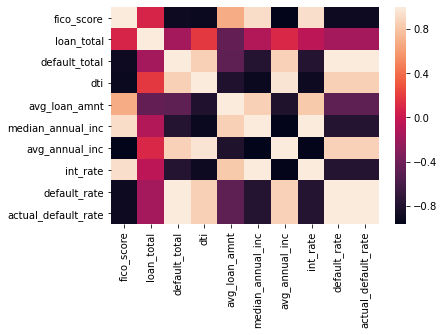

In [78]:
sns.heatmap(fico_df.corr())